In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

In [2]:
originalDf = pd.read_csv('cybercola.csv', delimiter=',', on_bad_lines='skip') # We will skip the last line who is missing data and is not in correct format
originalDf.head()

,Unnamed: 0,Fecha,Pedido #,Ingresos netos (con formato),Estado,Tipo de cliente,Producto(s),Artículos vendidos,Cupón(es),Ingresos netos,Atribución,Número de factura
0,0,2024-07-15 23:53:14,66088,"40,00€",completed,returning,"3× Cybercola Light - Botella 33 cl., 1× Cyberc...",4,NaN,33.06,Fuente: Amigos+Cybercola+Barcelona,NaN
1,1,2024-07-15 23:16:02,66087,"40,01€",completed,returning,"2× Cybercola Cherry - Botella 33cl, 1× Cyberco...",4,NaN,33.06,Fuente: Amigos+Cybercola+Barcelona,NaN
2,2,2024-07-15 22:38:49,66085,"40,01€",recogida,returning,"2× Cybercola Cherry - Botella 33cl, 1× Cyberco...",4,NaN,33.06,Fuente: Amigos+Cybercola+Barcelona,NaN
3,3,2024-07-15 22:08:13,66083,"40,00€",completed,returning,"1× Cybercola Cherry - Botella 33cl, 2× Cyberco...",4,NaN,33.06,Fuente: Amigos+Cybercola+Barcelona,NaN
4,4,2024-07-15 22:00:16,66082,"40,00€",completed,returning,"3× Cybercola Light - Botella 33 cl., 1× Cyberc...",4,NaN,33.06,Fuente: Amigos+Cybercola+Barcelona,NaN


In [3]:
# Print of feature types
print(originalDf.dtypes)

Unnamed: 0                        int64
Fecha                            object
Pedido #                          int64
Ingresos netos (con formato)     object
Estado                           object
Tipo de cliente                  object
Producto(s)                      object
Artículos vendidos               object
Cupón(es)                       float64
Ingresos netos                   object
Atribución                       object
Número de factura               float64
dtype: object


In [4]:
unique_estado = originalDf['Estado'].unique()
unique_client_type = originalDf['Tipo de cliente'].unique()
unique_cupones = originalDf['Cupón(es)'].unique()
unique_atribucion = originalDf['Atribución'].unique()
unique_factura = originalDf['Número de factura'].unique()
unique_atribution = originalDf['Atribución'].unique()

print("Estados:\n", unique_estado)
print("Tipos cliente:\n ", unique_client_type)
print("Cupones:\n", unique_cupones)
print("Facturas:\n", unique_factura)
print('Atribución:\n', unique_atribucion)

Estados:
 ['completed' 'recogida' 'refunded' 'enrutado']
Tipos cliente:
  ['returning' 'new']
Cupones:
 [nan]
Facturas:
 [nan]
Atribución:
 ['Fuente: Amigos+Cybercola+Barcelona' 'Orgánico: Google'
 'Referido: Mailchi.mp' 'Directo' 'Fuente: Google'
 'Referido: Comunidadmsm.es' 'Referido: Bing.com'
 'Administrador de la web' 'Fuente: Cyb' 'Desconocido'
 'Referido: Com.google.android.gm']


We can see that there are 'Ingresos netos (con formato)' and 'Ingresos netos,' which should apparently be the same. If we take a closer look at the data, we can easily see that the main difference is a 21% discrepancy, which corresponds to the VAT in Spain. If we apply a 21% increase to 'Ingresos netos,' we usually get 'Ingresos netos (con formato).' However, in some cases, 'Ingresos netos (con formato)' is higher. This could be due to other factors, such as shipping costs or unregistered discounts.

DATA CLEAN

In [5]:
# There is duplicated orders, we are going to visualize it
# Identify "Pedido #" values that are duplicated and visualize it
duplicateOrders = originalDf[originalDf.duplicated(subset=['Pedido #'], keep=False)] # We put keep as a False because we want to mantain both rows
duplicateOrders = duplicateOrders.sort_values(by='Pedido #', ascending=True)
duplicateOrders.head(10)

,Unnamed: 0,Fecha,Pedido #,Ingresos netos (con formato),Estado,Tipo de cliente,Producto(s),Artículos vendidos,Cupón(es),Ingresos netos,Atribución,Número de factura
9005,9005,2023-11-15 16:27:28,55125,"30,00€ 0,00€",refunded,returning,"2× Cybercola Cherry - Botella 33cl, 1× Cyberco...",3,NaN,24.79,Desconocido,NaN
8808,8808,2023-11-16 10:29:38,55125,"30,00€ 0,00€",refunded,returning,"2× Cybercola Cherry - Botella 33cl, 1× Cyberco...",0,NaN,'-30,Desconocido,NaN
8617,8617,2023-11-17 17:49:18,55552,"24,63€ 0,00€",refunded,returning,1× Cybercola Zero - Lata 33cl,0,NaN,'-24.63,Desconocido,NaN
8631,8631,2023-11-17 15:49:22,55552,"24,63€ 0,00€",refunded,new,1× Cybercola Zero - Lata 33cl,1,NaN,12.09,Desconocido,NaN
7487,7487,2023-12-21 22:24:56,55721,"80,00€ 60,00€",completed,returning,7× Cybercola Txirene,0,NaN,0,Desconocido,NaN
8501,8501,2023-11-19 17:41:16,55721,"80,00€ 60,00€",completed,new,7× Cybercola Txirene,7,NaN,57.85,Desconocido,NaN
8465,8465,2023-11-19 21:39:56,55761,"20,00€ 10,00€",completed,new,"1× Cybercola Bilbao Basket, 1× Cybercola Light...",2,NaN,16.52,Desconocido,NaN
7490,7490,2023-12-21 21:20:18,55761,"20,00€ 10,00€",completed,returning,"1× Cybercola Bilbao Basket, 1× Cybercola Light...",'-1,NaN,'-8.26,Desconocido,NaN
8424,8424,2023-11-23 17:41:29,55817,"29,00€ 0,00€",refunded,returning,1× Cybercola Zero - Lata 33cl,0,NaN,'-29,Desconocido,NaN
8426,8426,2023-11-23 16:10:07,55817,"29,00€ 0,00€",refunded,new,1× Cybercola Zero - Lata 33cl,1,NaN,15.7,Desconocido,NaN


Most of this orders duplicated are a refund, there is different types. Most commmon is that everything is refunded
An example would be the case of the Order = 55125 that everything was returned
Second case is where just a part is returned
We can also see that there could be some erros in classification of new clients, if we look at client with Pedido=55761 the second order is marked as new client
but the original order which was in the past, was marked as a returning client, unfortunately I don't have time to dive deep into this

We can see that there is rows where Ingresos netos(con formato) have more than one number, this is because most of them are refunds,
So we interpret that it is the final balance of the operation. E.g if we are refunding an order of 30€ the numbers would be '30,00€ 0,00€'
Because 30 will be the amount returned and the final balance of the operation would be +30 -30 = 0.
So before format Ingresos netos con format we will put this into a new column called 'Balance final'

In [6]:
# We will create two more columns, numerical, one for Ingersos netos(the normal) called limpios and the Balance final
df_cleaned = originalDf.copy()

df_cleaned['Ingresos netos (con formato)'] = df_cleaned['Ingresos netos (con formato)'].replace({'€': '', ',': '.'}, regex=True)
df_cleaned['Ingresos netos (limpios)'] = df_cleaned['Ingresos netos (con formato)'].str.extract(r'(\d+\.\d+)', expand=False).astype(float)
df_cleaned['Balance final'] = df_cleaned['Ingresos netos (con formato)'].str.extract(r'\d+\.\d+\s+(\d+\.\d+)', expand=False).astype(float)
rows_with_balance = df_cleaned[df_cleaned['Balance final'].notna()]

print(rows_with_balance[['Ingresos netos (con formato)', 'Ingresos netos (limpios)', 'Balance final']])


     Ingresos netos (con formato)  Ingresos netos (limpios)  Balance final
210                    30.00 0.00                     30.00            0.0
515                  140.00 80.00                    140.00           80.0
522                  140.00 80.00                    140.00           80.0
627                   35.50 34.50                     35.50           34.5
666                   138.00 0.00                    138.00            0.0
...                           ...                       ...            ...
8501                  80.00 60.00                     80.00           60.0
8617                   24.63 0.00                     24.63            0.0
8631                   24.63 0.00                     24.63            0.0
8808                   30.00 0.00                     30.00            0.0
9005                   30.00 0.00                     30.00            0.0

[120 rows x 3 columns]


In [7]:
df_cleaned['Fecha'] = pd.to_datetime(df_cleaned['Fecha'], errors='coerce') # Convert 'Fecha' to datetime
df_cleaned['Artículos vendidos'] = pd.to_numeric(df_cleaned['Artículos vendidos'], errors='coerce') # Convert 'Artículos vendidos' to numerical

In [8]:
# We have to clean 'Ingresos netos' before convert it into a float, because there is a wrong format of '-number
def clean_net_income(value):
    if isinstance(value, str):
        # Remove unwanted characters and manage negatives
        cleaned_value = re.sub(r"[^\d\.\-]", "", value)
        return cleaned_value
    return value

df_cleaned['Ingresos netos'] = df_cleaned['Ingresos netos'].apply(clean_net_income)
df_cleaned['Ingresos netos'] = pd.to_numeric(df_cleaned['Ingresos netos'], errors='coerce')

### DESCRIPTION OF FEATURES

The features collected are:

**Fecha**: the date of the order

**Pedido #**: id of the order

**Ingresos netos(con formato)**: net income before taxes and discounts(this include the VAT of 21%)

**Estado**: state of the order, it could be completed, recogida, refunded or enrutado
Completed -> the order was delivered successfully
Recogida -> Awaiting 

**Tipo de cliente**: type of client that makes the order, it could be returning or new

**Producto(s)**: name of products included in the order, is a string of strings sepparated by ','

**Artículos vendidos**: number of items sold in the order, it counts de number of products

**Cupón(es)**: discount code, all Nan

**Ingresos netos**: net income after taxes and discounts

**Atribución**: source of the client order

**Número de factura**: number of the bill, all Nan

Let's analyze the ditribution of the orders by month and by hours during the day, this could help us to understan better our customers behaviour and modelize the ICP

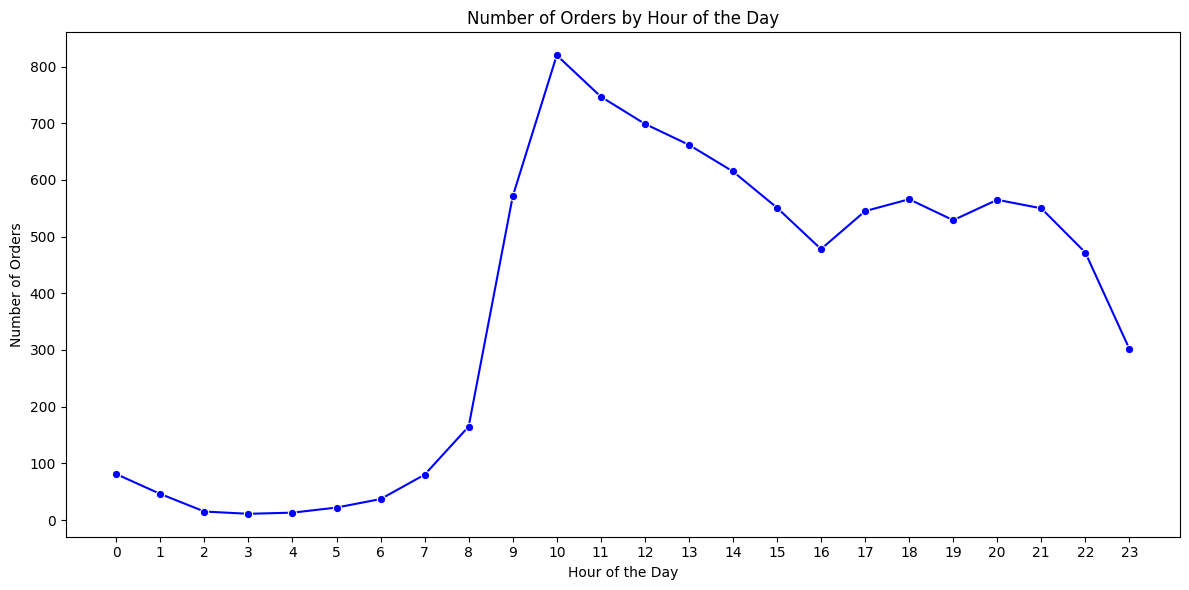

In [9]:
df_cleaned['Hour'] = df_cleaned['Fecha'].dt.hour
orders_per_hour = df_cleaned.groupby('Hour').size()

plt.figure(figsize=(12, 6))
sns.lineplot(x=orders_per_hour.index, y=orders_per_hour.values, marker='o', color='b')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Hour of the Day')
plt.xticks(range(24))
plt.tight_layout()
plt.show()

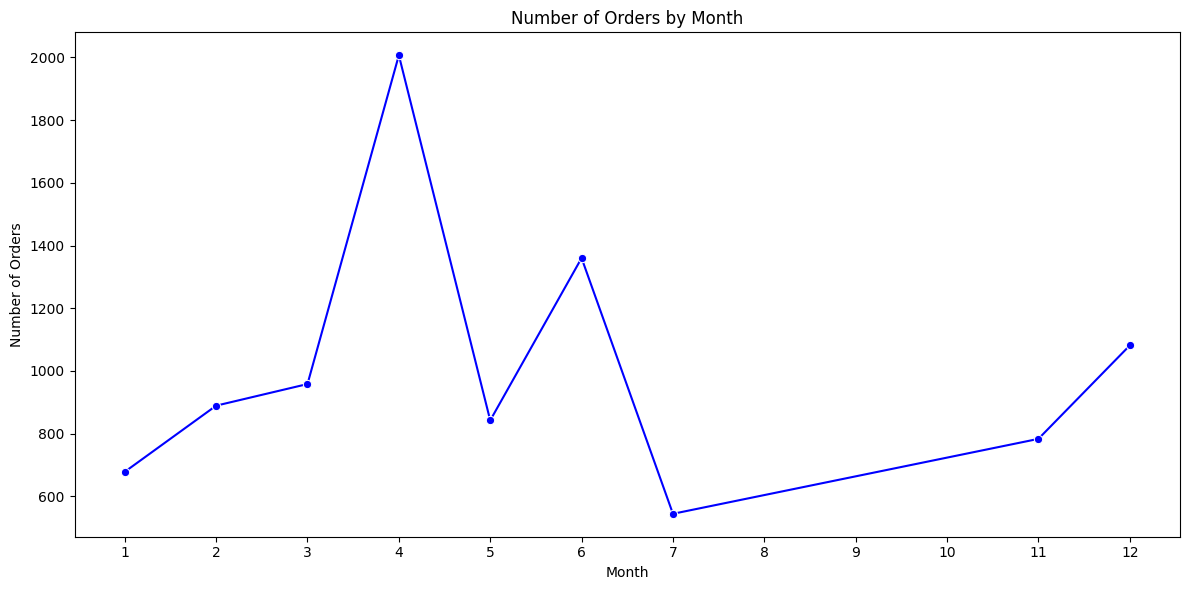

In [10]:
df_cleaned['Month'] = df_cleaned['Fecha'].dt.month
orders_per_month = df_cleaned.groupby('Month').size()

plt.figure(figsize=(12, 6))
sns.lineplot(x=orders_per_month.index, y=orders_per_month.values, marker='o', color='b')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Month')
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()


### ANALYSIS

As I don't have customer_id or anything to associate each order to a customer I approach this problem.
If we had a column with CIF or NIF, we would count the unique values and we will obtain the number of customers, for the average purchase we will group by CIF/NIF and calculate the average of each customer, once we have each average we would calculate the total average and deviation from it

In [11]:
# Drop the oldest duplicate order because it will be a refun, and keep the original to don't count the refund as another order
df_cleaned_sorted = df_cleaned.sort_values(by='Fecha', ascending=True)
df_unique_pedidos = df_cleaned_sorted.drop_duplicates(subset=['Pedido #'], keep='first')
# Drop the rows where the cost income was 0€
df_filtered = df_unique_pedidos[df_unique_pedidos['Ingresos netos (limpios)'] > 0]


In [12]:
# First of all, we count the number of new clients
# For this I substracted the refund rows, so I interpreted that if not I would be counting twice the same client
noRefundDf = df_filtered[df_filtered['Estado'] != 'refunded']
newCustomersCount = noRefundDf[noRefundDf['Tipo de cliente'] == 'new'].shape[0]
returningCustomersCount = noRefundDf[noRefundDf['Tipo de cliente'] != 'new'].shape[0]

print("Number of new clients", newCustomersCount)
print("Number of returning clients", returningCustomersCount)          

Number of new clients 2769
Number of returning clients 6232


As we don't have anything to grup orders by customer, at this point it makes more sense to sepparate data with Persons and Restaurants. For this we're going to invent an heuristic. Documenting on internet, the average consumption of drinks per Spanish citizen is 46.7L per year. This makes an average of 140 cans per year, which is a dozen per month. We will count that those who repeat ordering with us, make an order every two months, and is for two persons so we will count orders of less than 4packs as personal orders. This makes a bit larger, with problems like no all the cans are 33cl size, or there is other products like Gildas or T-shirts... and to optimize the time to make other analysis I will assume that orders above 40€ will be from bars and under 40€ for persons clients

Source: https://www.mercasa.es/wp-content/uploads/2023/02/02-Consumo-de-bebidas-refrescantes-en-Espana.pdf

In [13]:
dfBars = noRefundDf[noRefundDf['Ingresos netos (limpios)'] > 40]
dfPersons = noRefundDf[noRefundDf['Ingresos netos (limpios)'] <= 40]
total_bars = dfBars.shape[0]
total_persons = dfPersons.shape[0]
print("Number of persons orders", total_persons)
print("Number of bars orders", total_bars)

Number of persons orders 5626
Number of bars orders 3375


In [59]:
def estimate_customers(df, repeat_probs, isBar=False):
    df = df.copy()
    # Add a new column to classify by month
    df.loc[:, 'MonthYear'] = df['Fecha'].dt.to_period('M')
    monthly_customers = {}
    
    # Initialize a list to track recurrent customers for the previous 4 months
    recurrent_counts = [0, 0, 0, 0]
    
    for month in sorted(df['MonthYear'].unique()):
        # Filter data for the current month and count new customers
        current_month_df = df[df['MonthYear'] == month]
        new_customers = current_month_df[current_month_df['Tipo de cliente'] == 'new'].shape[0]
        
        # Calculate returning customers for the current month based on the probabilities of recurrency
        recurrent_customers = int(sum([recurrent_counts[i] * repeat_probs[i] for i in range(len(recurrent_counts))]))
        total_returning = current_month_df[current_month_df['Tipo de cliente'] == 'returning'].shape[0]
        estimated_new_customers = max(total_returning - recurrent_customers, 0) + new_customers
        
        # Update recurrent counts for next month
        recurrent_counts = [estimated_new_customers] + recurrent_counts[:-1]       
        monthly_customers[str(month)] = {
            'new_customers': new_customers,
            'recurrent_customers': recurrent_customers,
            'total_customers': estimated_new_customers + recurrent_customers,
            'total_new_customers': estimated_new_customers 
        }
    
    # Showing the table
    monthly_customers_df = pd.DataFrame.from_dict(monthly_customers, orient='index')
    print(monthly_customers_df)

     # Create the DataFrame from the dictionary and melt the df for seaborn
    monthly_customers_df = pd.DataFrame.from_dict(monthly_customers, orient='index').reset_index()
    monthly_customers_df.rename(columns={'index': 'Month'}, inplace=True)
    monthly_customers_melted = monthly_customers_df.melt(id_vars=['Month'], value_vars=['new_customers', 'recurrent_customers', 'total_customers', 'total_new_customers'],
                                                         var_name='Customer_Type', value_name='Count')
    restaurant_or_bar = "Bar" if isBar else "Restaurant"
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=monthly_customers_melted, x='Month', y='Count', hue='Customer_Type', marker='o')
    
    plt.xlabel('Month')
    plt.ylabel('Number of Customers')
    plt.title(f"Estimated Order source Metrics per Month {restaurant_or_bar}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend(title='Customer Type')
    plt.show()

    return monthly_customers_df


         new_customers  recurrent_customers  total_customers  \
2023-11            178                    0              546   
2023-12            155                   81              830   
2024-01             82                  276              491   
2024-02            204                  322              555   
2024-03            273                  216              569   
2024-04            549                  186             1224   
2024-05            100                  300              400   
2024-06            225                  380              736   
2024-07             31                  225              312   

         total_new_customers  
2023-11                  546  
2023-12                  749  
2024-01                  215  
2024-02                  233  
2024-03                  353  
2024-04                 1038  
2024-05                  100  
2024-06                  356  
2024-07                   87  


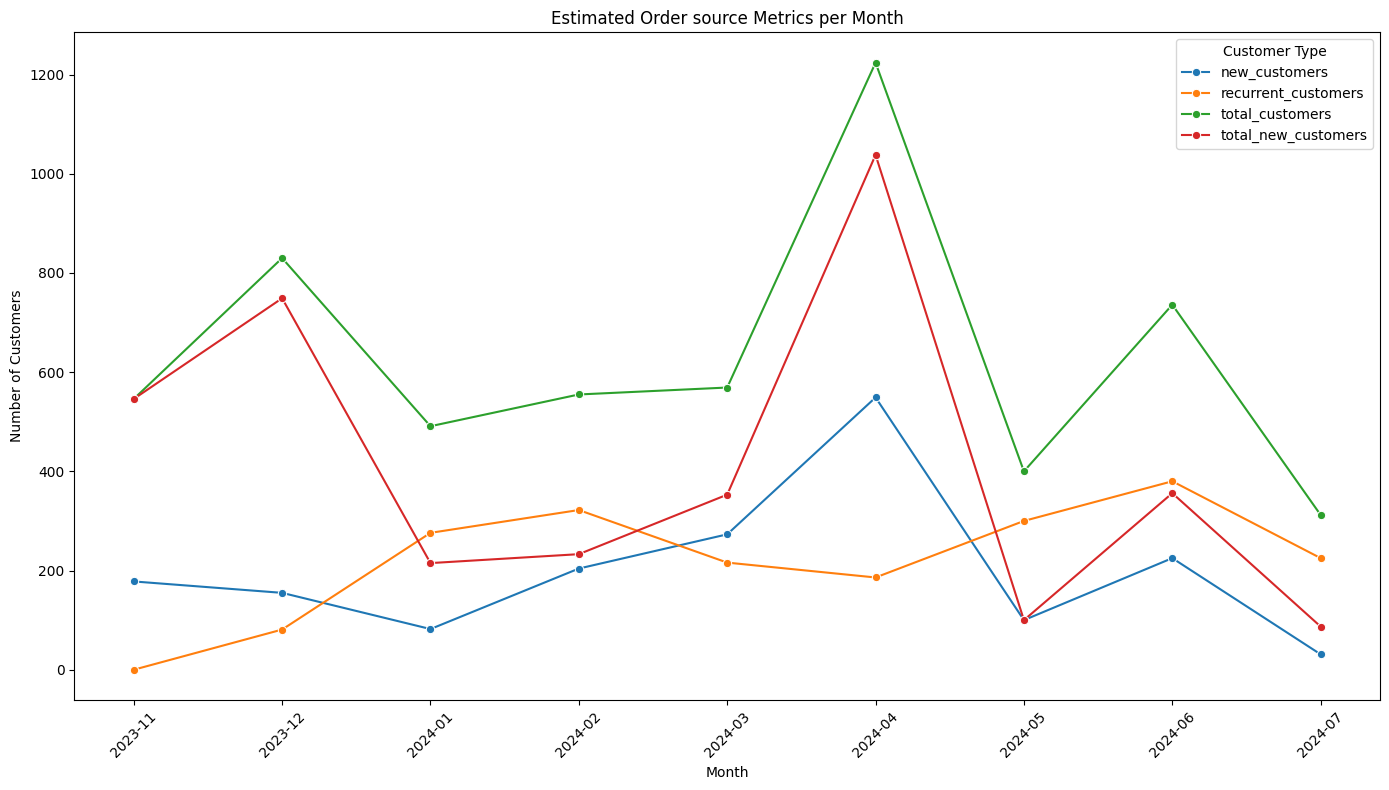

Total persons new customers:  3677


In [60]:
monthly_customers_df_persons = estimate_customers(dfPersons, [0.15, 0.3, 0.12, 0.05])
# Sum of the 'total_new_customers' column from the DataFrame
total_new_persons_customers_sum = monthly_customers_df_persons['total_new_customers'].sum()
print("Total persons new customers: ", total_new_persons_customers_sum)


         new_customers  recurrent_customers  total_customers  \
2023-11             76                    0              231   
2023-12             33                  115              205   
2024-01             35                  102              179   
2024-02             83                   95              329   
2024-03            178                  149              370   
2024-04            342                  180              761   
2024-05             75                  380              462   
2024-06            119                  219              609   
2024-07             31                  302              333   

         total_new_customers  
2023-11                  231  
2023-12                   90  
2024-01                   77  
2024-02                  234  
2024-03                  221  
2024-04                  581  
2024-05                   82  
2024-06                  390  
2024-07                   31  


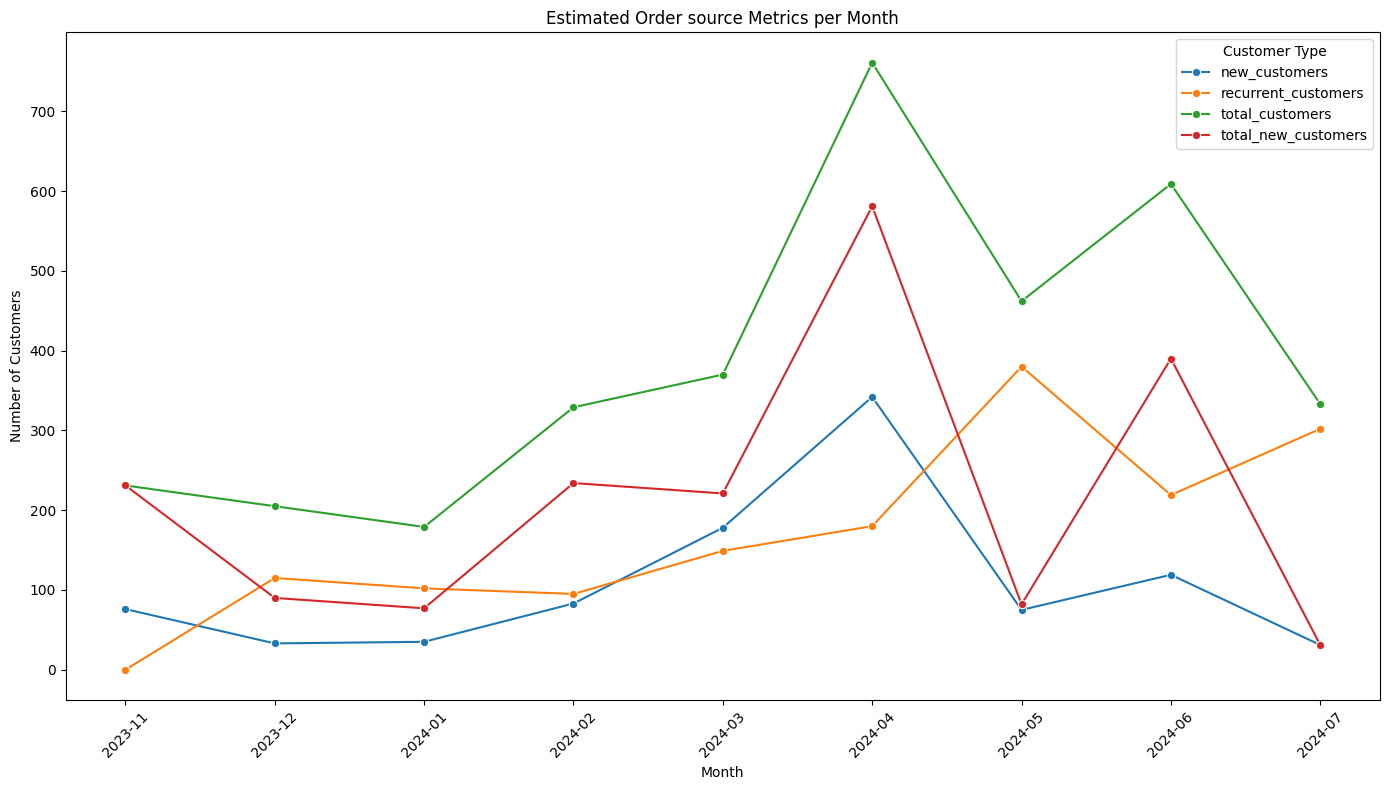

Total bars new customers:  1937


In [61]:
monthly_customers_df_bars = estimate_customers(dfBars, [0.5, 0.25, 0.15, 0])
# Sum of the 'total_new_customers' column from the DataFrame
total_new_bars_customers_sum = monthly_customers_df_bars['total_new_customers'].sum()
print("Total bars new customers: ", total_new_bars_customers_sum)


In [17]:
# Calculate the mean and standard deviation of 'Ingresos netos (limpios)'
mean = df_filtered['Ingresos netos (limpios)'].mean()
std_dev = df_filtered['Ingresos netos (limpios)'].std()

print(f"Mean of 'Ingresos netos (limpios)': {mean}")
print(f"Standard Deviation of 'Ingresos netos (limpios)': {std_dev}")

Mean of 'Ingresos netos (limpios)': 44.230875996457044
Standard Deviation of 'Ingresos netos (limpios)': 37.93649808131454


In [18]:
# Calculate now the mean and sd for bars and persons
mean_bars = dfBars['Ingresos netos (limpios)'].mean()
std_dev_bars = dfBars['Ingresos netos (limpios)'].std()

print(f"Mean of dfBars 'Ingresos netos (limpios)': {mean_bars}")
print(f"Standard Deviation of dfBars 'Ingresos netos (limpios)': {std_dev_bars}")

mean_persons = dfPersons['Ingresos netos (limpios)'].mean()
std_dev_persons = dfPersons['Ingresos netos (limpios)'].std()

print(f"Mean of df persons 'Ingresos netos (limpios)': {mean_persons}")
print(f"Standard Deviation of df persons 'Ingresos netos (limpios)': {std_dev_persons}")

Mean of dfBars 'Ingresos netos (limpios)': 69.26547851851852
Standard Deviation of dfBars 'Ingresos netos (limpios)': 52.007884441713315
Mean of df persons 'Ingresos netos (limpios)': 29.238134909349448
Standard Deviation of df persons 'Ingresos netos (limpios)': 9.05197306466856


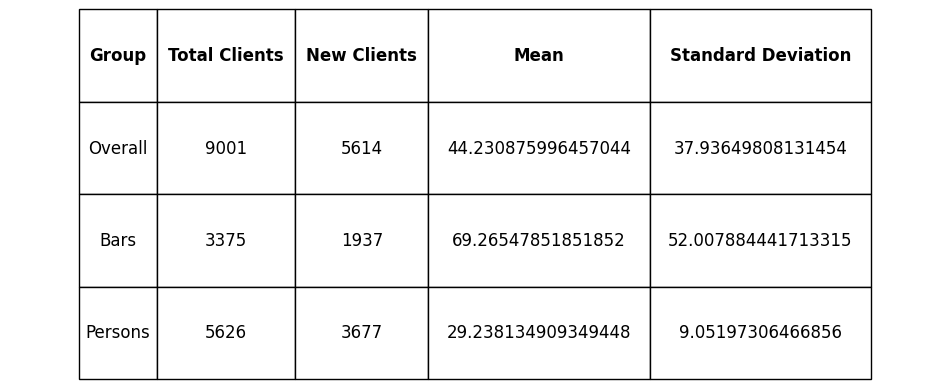

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for the table
data = {
    'Group': ['Overall', 'Bars', 'Persons'],
    'Total Clients': [total_bars + total_persons, total_bars, total_persons],
    'New Clients': [total_new_bars_customers_sum + total_new_persons_customers_sum, total_new_bars_customers_sum, total_new_persons_customers_sum],
    'Mean': [mean, mean_bars, mean_persons],
    'Standard Deviation': [std_dev, std_dev_bars, std_dev_persons],
}

df_summary = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(12, 4))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df_summary.values, colLabels=df_summary.columns, cellLoc='center', loc='center',)

table.auto_set_font_size(False)
table.set_fontsize(12)  
table.auto_set_column_width(col=list(range(len(df_summary.columns))))

# Increase the height of the cells, if not it's to slim
for key, cell in table.get_celld().items():
    cell.set_height(0.3)

# Bold headers
for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_text_props(fontweight='bold')

plt.show()

We want to visualize how the orders are distributed, so we will make a plot to visualize it by ranges

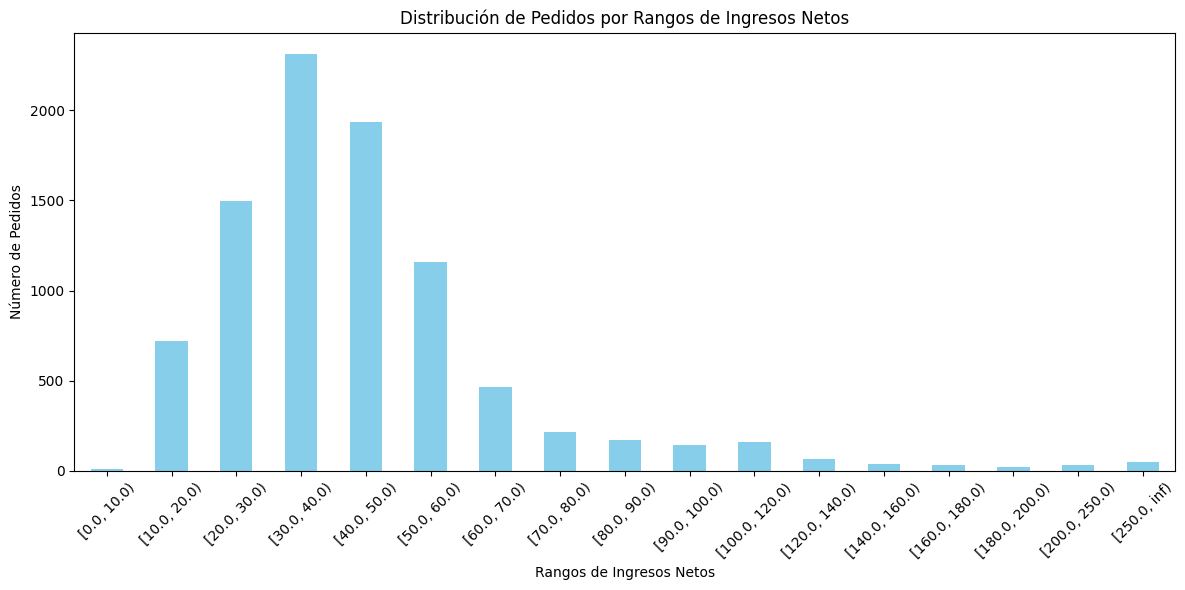

Ingresos_bins
[0.0, 10.0)         10
[10.0, 20.0)       721
[20.0, 30.0)      1496
[30.0, 40.0)      2313
[40.0, 50.0)      1934
[50.0, 60.0)      1156
[60.0, 70.0)       465
[70.0, 80.0)       218
[80.0, 90.0)       171
[90.0, 100.0)      142
[100.0, 120.0)     161
[120.0, 140.0)      68
[140.0, 160.0)      41
[160.0, 180.0)      33
[180.0, 200.0)      20
[200.0, 250.0)      32
[250.0, inf)        51
Name: count, dtype: int64


In [20]:
incomeBinsDf = df_filtered.copy()

# Create a new column 'Ingresos_bins' to categorize the income in their category
bins = list(range(0, 101, 10)) + list(range(100, 201, 20)) + [200, 250, float('inf')]
incomeBinsDf['Ingresos_bins'] = pd.cut(incomeBinsDf['Ingresos netos (limpios)'], bins=bins, right=False, labels=None, duplicates='drop')

# Count the number of orders in each bin
orders_count = incomeBinsDf['Ingresos_bins'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
orders_count.plot(kind='bar', color='skyblue')
plt.xlabel('Rangos de Ingresos Netos')
plt.ylabel('Número de Pedidos')
plt.title('Distribución de Pedidos por Rangos de Ingresos Netos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(orders_count)


##### PRODUCTOS

                                            Product  Count
20  DESCUENTO ESPECIAL POR ENTREGA ERRONEA ANTERIOR      2
21                           Camiseta Cybercola - M      2
22                           Camiseta Cybercola - L      2
23                    Caja Regalo 2023-  3 botellas      1
24             Caja Regalo Cybercola Sirimiri (7ud)      1
25                      Balon Oficial Bilbao Basket      1
27                             Cybercola SirimiriDe      1
28                         Camiseta Cybercola promo      1


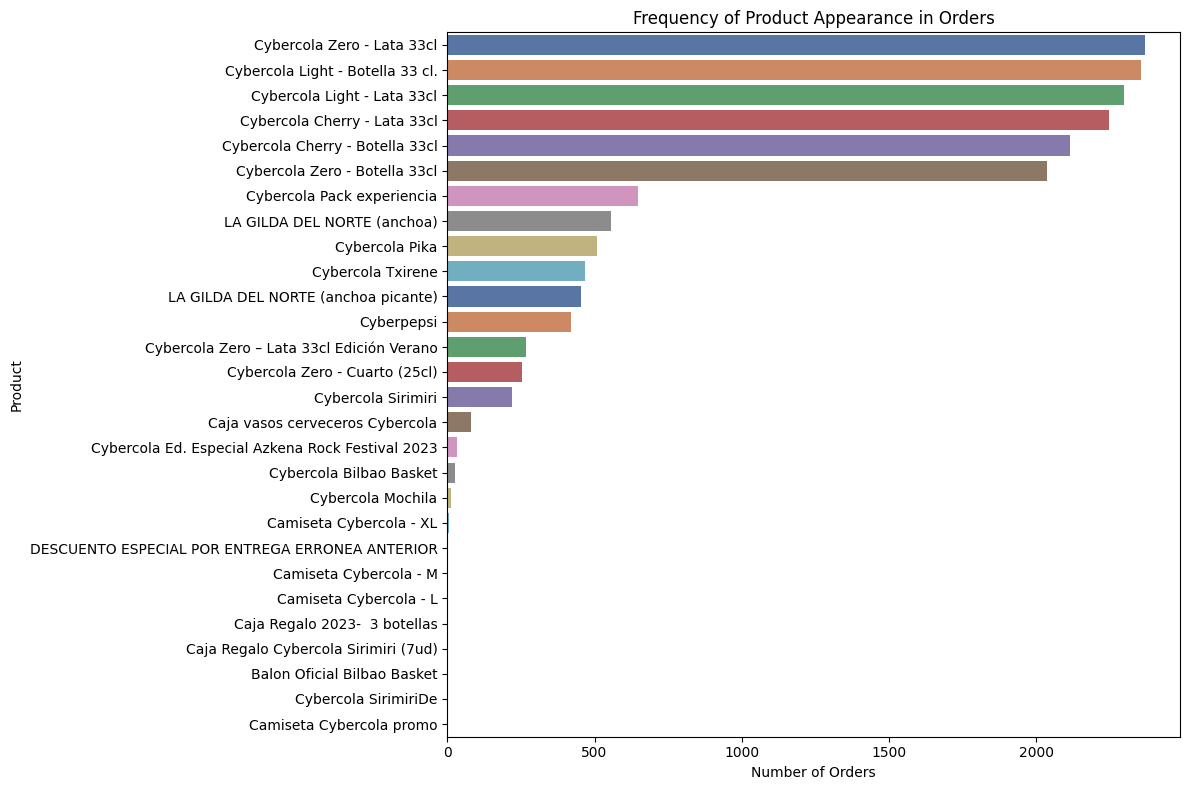

In [36]:
# Calculate the frequency of product appearance in orders"
# We are starting from df_unique_pedidos to don't count twice in refund orders
allProducts = df_unique_pedidos['Producto(s)'].str.split(',').explode().str.strip() # Last strip is for the case there is white spaces

def clean_product_name(product):
    if isinstance(product, str):
        # Use regex to remove quantity prefix (e.g., '3× ', '2x ') only at the start of the string and not in the middle
        return re.sub(r'^\d+\s*[×x]\s*', '', product).strip()
    return product

allProductsCleaned = allProducts.apply(clean_product_name) # Apply to each row

# Count the frequency of each product
productCounts = allProductsCleaned.value_counts().reset_index()
productCounts.columns = ['Product', 'Count']
# Manually remove the product entry with '-114× Cyberpepsi'
productCountsCleaned = productCounts[productCounts['Product'] != '-114× Cyberpepsi']
print(productCountsCleaned.tail(8))

# Visualization sorted
productCounts_sorted = productCountsCleaned.sort_values(by='Count', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(data=productCounts_sorted, x='Count', y='Product', hue='Product', dodge=False, palette='deep', legend=False)
plt.xlabel('Number of Orders')
plt.ylabel('Product')
plt.title('Frequency of Product Appearance in Orders')
plt.tight_layout()
plt.show()


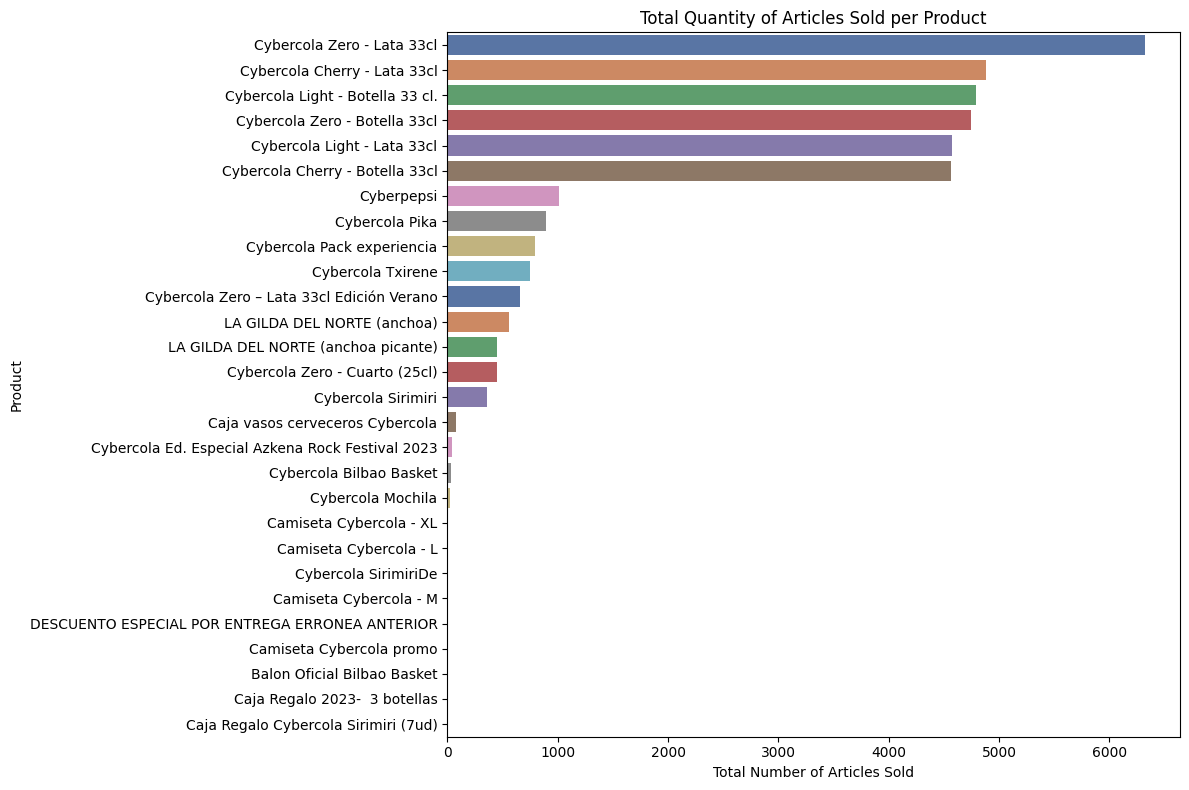

In [41]:
# Function to extract quantity and product name
def extract_quantity_and_name(product):
    if isinstance(product, str):
        match = re.match(r'^\s*(\d+)\s*[×x]\s*(.*)', product)
        if match:
            quantity = int(match.group(1))
            name = match.group(2).strip()
            return quantity, name
        else:
            # If no quantity is provided, assume it's 1
            return 1, product.strip()
    return 1, product

# Apply extraction to get quantities and cleaned product names
products_with_quantities = allProducts.apply(extract_quantity_and_name)
products_with_quantities_df = pd.DataFrame(products_with_quantities.tolist(), columns=['Quantity', 'Cleaned Product'])

# Sum the quantities for each product to get the total number of articles sold and sort them
total_articles_sold = products_with_quantities_df.groupby('Cleaned Product')['Quantity'].sum().reset_index()
total_articles_sold_sorted = total_articles_sold.sort_values(by='Quantity', ascending=False)

# Manually remove the product entry with '-114× Cyberpepsi'
total_articles_sold_sorted = total_articles_sold_sorted[total_articles_sold_sorted['Cleaned Product'] != '-114× Cyberpepsi']

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(data=total_articles_sold_sorted, x='Quantity', y='Cleaned Product', hue='Cleaned Product', dodge=False, palette='deep', legend=False)
plt.xlabel('Total Number of Articles Sold')
plt.ylabel('Product')
plt.title('Total Quantity of Articles Sold per Product')
plt.tight_layout()
plt.show()


We calculate the average number of articles per orderd for each Product to better understand consumption, it could be useful for offering packs or discounts

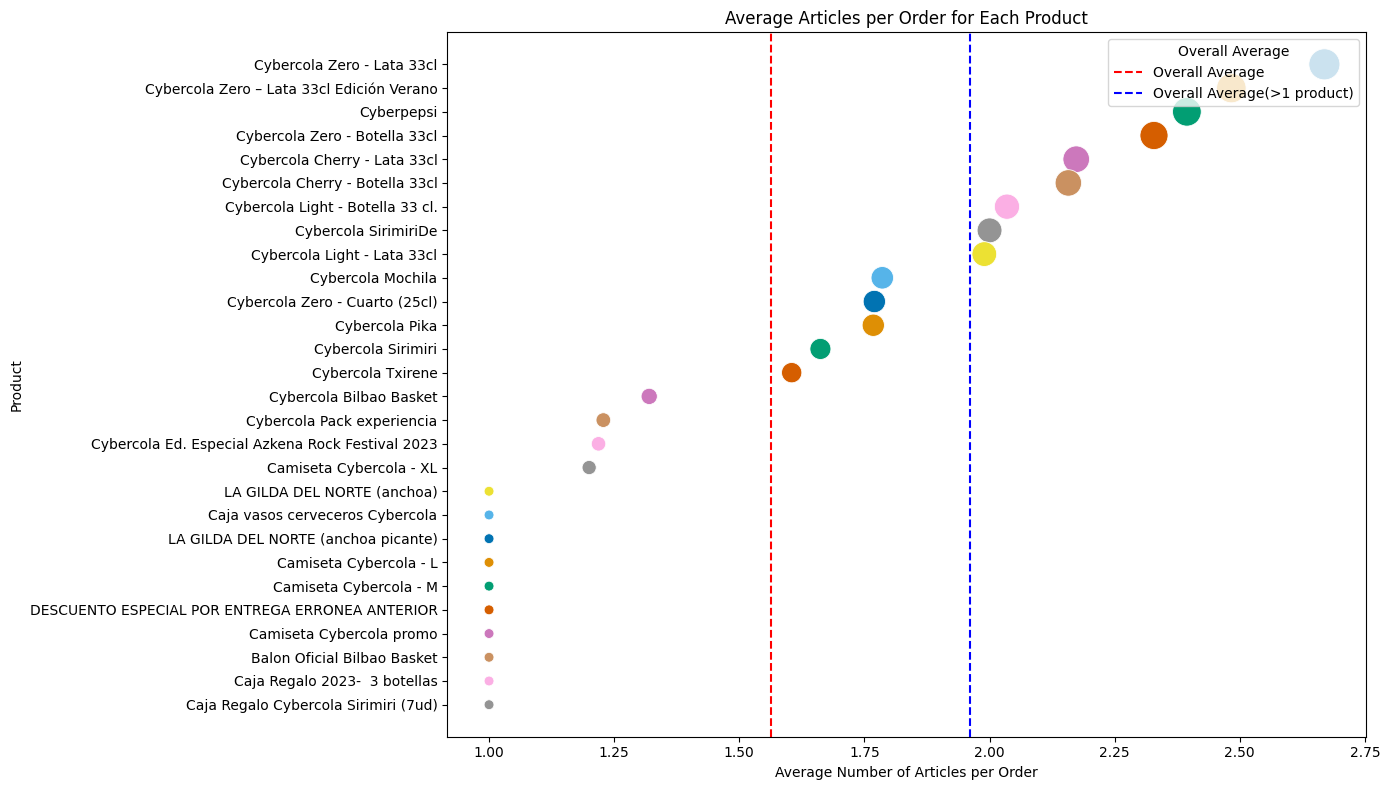

In [54]:
# Merge the two DataFrames to alculate the average articles per order
merged_df = pd.merge(total_articles_sold_sorted, productCountsCleaned, left_on='Cleaned Product', right_on='Product')
merged_df['Average Articles per Order'] = merged_df['Quantity'] / merged_df['Count']

# Visualization sorted
merged_df_sorted = merged_df.sort_values(by='Average Articles per Order', ascending=False)
top_16_average = merged_df_sorted.head(16)['Average Articles per Order'].mean()
plt.figure(figsize=(14, 8))
sns.scatterplot(data=merged_df_sorted, x='Average Articles per Order', y='Product', hue='Product', size='Average Articles per Order', sizes=(50, 500), palette='colorblind', legend=False)
plt.axvline(merged_df_sorted['Average Articles per Order'].mean(), color='red', linestyle='--', linewidth=1.5, label='Overall Average')
plt.axvline(top_16_average, color='blue', linestyle='--', linewidth=1.5, label='Overall Average(>1 product)')
plt.xlabel('Average Number of Articles per Order')
plt.ylabel('Product')
plt.title('Average Articles per Order for Each Product')
plt.legend(title='Overall Average', loc='upper right')
plt.tight_layout()
plt.show()


To calculate the average price per product the ideal would be to have a column with the price of each product, because now if there is more than one product in the same order, we can't know the price that has been sold each product, we just have the number and type of products, and the total income before and afte VAT and discounts, and for example, we probably have cases where discounts are just in x products of the total order.

What we are going to make to calculate the average price we are selling each product is, first of all, calculate the average price we are selling the products when they are sold alone, so we can identify a static price. Once we have this, we will include those pricings in multiple products orders, to introduce their price to the final list of prices and calculate the average. We will calculate the total discount we made and apply it to the previous calculated base price. With this methodology, we would be closer to the price than dividing the total price in the number of products, here you have an example.


Product 1 base price: 12€

Product 2 base price: 7€

Total order price of product 1 and 2 is: 15€

Expected order price was: 12+7=19€

If we divide as we make to calculate the basement price of solo products, the price for each product would be 7.5€, what does not make sense, specifically for Product 2 who is increasing the price.

So we will calculate 4/19 = 0.2105 of discount and apply it to each product

Product 1 selling price: 12 * 0.7895 = 9.474€

Product 2 selling price: 7 * 0.7895 = 5.5265€
Total price: 15€

Finally we would add them to the list and calculate the average selling price

In [23]:
# First we create a dataframe of those orders where just a single product was sold
# Assuming df_unique_pedidos is already defined and contains the columns 'Producto(s)' and 'Ingresos netos (limpios)'

# Identify single-product orders
single_product_orders = df_unique_pedidos[df_unique_pedidos['Producto(s)'].str.contains(',', regex=False) == False]

single_product_orders.head()

,Unnamed: 0,Fecha,Pedido #,Ingresos netos (con formato),Estado,Tipo de cliente,Producto(s),Artículos vendidos,Cupón(es),Ingresos netos,Atribución,Número de factura,Ingresos netos (limpios),Balance final,Hour,Month
9141,9141,2023-11-13 12:17:43,54961,21.56,completed,new,1× Cybercola Light - Lata 33cl,1.0,NaN,17.82,Desconocido,NaN,21.56,NaN,12,11
9140,9140,2023-11-14 18:23:42,54972,19.00,completed,returning,1× Cybercola Zero - Lata 33cl,1.0,NaN,15.70,Desconocido,NaN,19.00,NaN,18,11
9137,9137,2023-11-15 10:37:52,54974,40.00,completed,returning,4× Cybercola Zero - Lata 33cl,4.0,NaN,33.06,Desconocido,NaN,40.00,NaN,10,11
9135,9135,2023-11-15 10:43:05,54977,10.00,completed,returning,1× Cybercola Light - Botella 33 cl.,1.0,NaN,8.26,Desconocido,NaN,10.00,NaN,10,11
9133,9133,2023-11-15 10:48:01,54980,30.00,completed,returning,3× Cybercola Cherry - Botella 33cl,3.0,NaN,24.79,Desconocido,NaN,30.00,NaN,10,11


In [24]:
# Obtaining a dataframe of orders that just have one product
single_product_orders = df_unique_pedidos[df_unique_pedidos['Producto(s)'].str.contains(',', regex=False) == False].copy()

# Extraction to get quantity and cleaned names
single_product_orders[['Quantity', 'Cleaned_Product']] = single_product_orders['Producto(s)'].apply(
    lambda x: pd.Series(extract_quantity_and_name(x))
)

# Using .loc[] to avoid the warning
single_product_orders.loc[:, 'Price_per_Unit'] = single_product_orders['Ingresos netos (limpios)'] / single_product_orders['Quantity']
single_product_orders.loc[:, 'Net_price_per_unit'] = single_product_orders['Ingresos netos'] / single_product_orders['Quantity']

# Calculate the averages
product_base_prices = (
    single_product_orders.groupby('Cleaned_Product')
    .agg({'Price_per_Unit': 'mean', 'Net_price_per_unit': 'mean'})
    .reset_index()
)

print(product_base_prices)


                                     Cleaned_Product  Price_per_Unit  \
0                        Balon Oficial Bilbao Basket       18.000000   
1               Caja Regalo Cybercola Sirimiri (7ud)       12.950000   
2                            Cybercola Bilbao Basket       16.875000   
3                    Cybercola Cherry - Botella 33cl       13.093696   
4                       Cybercola Cherry - Lata 33cl       11.727791   
5   Cybercola Ed. Especial Azkena Rock Festival 2023       12.000000   
6                   Cybercola Light - Botella 33 cl.       12.800226   
7                        Cybercola Light - Lata 33cl       12.065398   
8                         Cybercola Pack experiencia       22.700249   
9                                     Cybercola Pika       13.709459   
10                                Cybercola Sirimiri       14.088235   
11                              Cybercola SirimiriDe       25.000000   
12                                 Cybercola Txirene       11.97

We can see that we just have obtained 16 out of the 26 different products there is in the database. So we are going to see the 10 missing Products and try to obtain them in orders where there is alone with Producto(s) that we have the average price calculated yet.

In [25]:
all_products = set(productCountsCleaned['Product'])
base_price_products = set(product_base_prices['Cleaned_Product'])

# Calculate products missing products
missing_products = all_products - base_price_products

print("Products not appearing in the base price calculation:\n",missing_products)
print(len(missing_products))

Products not appearing in the base price calculation:
 {'Camiseta Cybercola - XL', 'DESCUENTO ESPECIAL POR ENTREGA ERRONEA ANTERIOR', 'Cybercola Mochila', 'Caja vasos cerveceros Cybercola', 'Camiseta Cybercola - M', 'Caja Regalo 2023-  3 botellas', 'LA GILDA DEL NORTE (anchoa)', 'Camiseta Cybercola promo', 'Camiseta Cybercola - L', 'LA GILDA DEL NORTE (anchoa picante)'}
10


We can see that the Product(s) (unless both GILDAs) are not relevant because are gists or T-shirt

##### ANOMALIES

In [26]:
# Top five more articles sold in the same order
top_orders = df_unique_pedidos.sort_values(by='Artículos vendidos', ascending=False).head(5)
top_orders.head()

,Unnamed: 0,Fecha,Pedido #,Ingresos netos (con formato),Estado,Tipo de cliente,Producto(s),Artículos vendidos,Cupón(es),Ingresos netos,Atribución,Número de factura,Ingresos netos (limpios),Balance final,Hour,Month
7325,7325,2023-12-28 11:38:44,57144,2.244.00,completed,returning,187× Cybercola Cherry - Botella 33cl,187.0,NaN,1854.55,Desconocido,NaN,2.244,NaN,11,12
7323,7323,2023-12-28 11:41:33,57146,1.560.00,completed,returning,"99× Cybercola Zero - Lata 33cl, 57× Cybercola ...",156.0,NaN,1289.25,Desconocido,NaN,1.560,NaN,11,12
7324,7324,2023-12-28 11:39:47,57145,1.620.00,completed,returning,"110× Cybercola Zero - Botella 33cl, 30× Cyberc...",140.0,NaN,1338.84,Desconocido,NaN,1.620,NaN,11,12
7326,7326,2023-12-28 11:37:39,57143,1.608.00,completed,new,"84× Cybercola Light - Botella 33 cl., 50× Cybe...",134.0,NaN,1328.93,Desconocido,NaN,1.608,NaN,11,12
8943,8943,2023-11-15 19:24:49,55192,1.160.00,completed,returning,"39× Cybercola Zero - Botella 33cl, 28× Cyberco...",115.0,NaN,950.40,Desconocido,NaN,1.160,NaN,19,11


In [27]:
# Top five net income
top_income = df_unique_pedidos.sort_values(by='Ingresos netos', ascending=False).head(5)
top_income.head()

,Unnamed: 0,Fecha,Pedido #,Ingresos netos (con formato),Estado,Tipo de cliente,Producto(s),Artículos vendidos,Cupón(es),Ingresos netos,Atribución,Número de factura,Ingresos netos (limpios),Balance final,Hour,Month
7325,7325,2023-12-28 11:38:44,57144,2.244.00,completed,returning,187× Cybercola Cherry - Botella 33cl,187.0,NaN,1854.55,Desconocido,NaN,2.244,NaN,11,12
1106,1106,2024-06-07 05:02:36,63938,1.395.36,completed,returning,114× Cyberpepsi,114.0,NaN,1395.36,Desconocido,NaN,1.395,NaN,5,6
1107,1107,2024-06-07 04:58:58,63937,1.395.36,completed,new,114× Cyberpepsi,114.0,NaN,1395.36,Desconocido,NaN,1.395,NaN,4,6
1105,1105,2024-06-07 05:04:49,63939,1.395.36,completed,returning,114× Cyberpepsi,114.0,NaN,1395.36,Desconocido,NaN,1.395,NaN,5,6
7324,7324,2023-12-28 11:39:47,57145,1.620.00,completed,returning,"110× Cybercola Zero - Botella 33cl, 30× Cyberc...",140.0,NaN,1338.84,Desconocido,NaN,1.620,NaN,11,12


In [28]:
# Count the unique attribution sources
attribution_counts = df_cleaned['Atribución'].value_counts().reset_index()
attribution_counts.columns = ['Atribución', 'Count']
print(attribution_counts)

                            Atribución  Count
0                          Desconocido   8688
1   Fuente: Amigos+Cybercola+Barcelona    331
2                       Fuente: Google     37
3                              Directo     35
4                     Orgánico: Google     21
5            Referido: Comunidadmsm.es     14
6              Administrador de la web      5
7                 Referido: Mailchi.mp      4
8                   Referido: Bing.com      4
9                          Fuente: Cyb      2
10     Referido: Com.google.android.gm      1


In [29]:
# Finding the oldest order with Atribuciòn distinct to 'Desconocido'
df_filtered_attribution = df_cleaned[df_cleaned['Atribución'] != 'Desconocido']
oldest_entry = df_filtered_attribution.sort_values(by='Fecha', ascending=True).head(1)

print(f"Oldest Entry:\n{oldest_entry[['Fecha', 'Atribución']]}")



Oldest Entry:
                  Fecha                          Atribución
456 2024-07-04 08:41:45  Fuente: Amigos+Cybercola+Barcelona


The problem here was not how we are collecting the attribution, because we started to collect it just two months ago. So we will make a better plot for this period since we have data

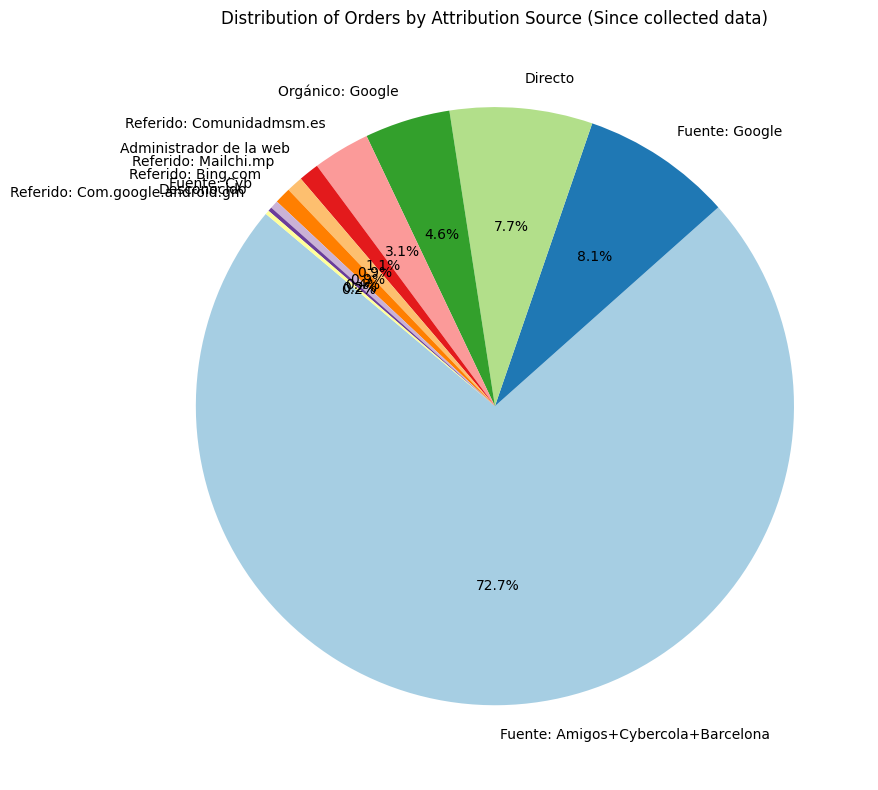

In [58]:
# Get the data starting at the oldest_date
oldest_date = oldest_entry['Fecha'].iloc[0]
df_filtered_recent = df_cleaned[df_cleaned['Fecha'] > oldest_date]

# Count the attribution sources, including 'Desconocido'
attribution_counts_recent = df_filtered_recent['Atribución'].value_counts().reset_index()
attribution_counts_recent.columns = ['Atribución', 'Count']

plt.figure(figsize=(10, 8))
plt.pie(attribution_counts_recent['Count'], labels=attribution_counts_recent['Atribución'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Paired', len(attribution_counts_recent)))
plt.title('Distribution of Orders by Attribution Source (Since collected data)')
plt.tight_layout()
plt.show()


In [31]:
# Trying to deep dive into refunded
df_refunded = df_cleaned[df_cleaned['Estado'] == 'refunded']
df_refunded.head()

,Unnamed: 0,Fecha,Pedido #,Ingresos netos (con formato),Estado,Tipo de cliente,Producto(s),Artículos vendidos,Cupón(es),Ingresos netos,Atribución,Número de factura,Ingresos netos (limpios),Balance final,Hour,Month
210,210,2024-07-11 17:56:42,61811,30.00 0.00,refunded,returning,2× Cybercola Zero - Botella 33cl,0.0,NaN,0.00,Desconocido,NaN,30.0,0.0,17,7
666,666,2024-06-26 11:00:09,65246,138.00 0.00,refunded,returning,"2× Cybercola Cherry - Botella 33cl, 5× Cyberco...",NaN,NaN,-114.05,Desconocido,NaN,138.0,0.0,11,6
670,670,2024-06-26 10:21:58,65246,138.00 0.00,refunded,returning,"2× Cybercola Cherry - Botella 33cl, 5× Cyberco...",7.0,NaN,114.05,Desconocido,NaN,138.0,0.0,10,6
1774,1774,2024-06-05 17:49:31,61798,20.00 0.00,refunded,returning,"1× Cybercola Light - Botella 33 cl., 1× Cyberc...",0.0,NaN,0.00,Desconocido,NaN,20.0,0.0,17,6
1788,1788,2024-06-04 23:49:32,63446,70.00 0.00,refunded,returning,"2× Cybercola Cherry - Botella 33cl, 2× Cyberco...",NaN,NaN,-49.58,Desconocido,NaN,70.0,0.0,23,6


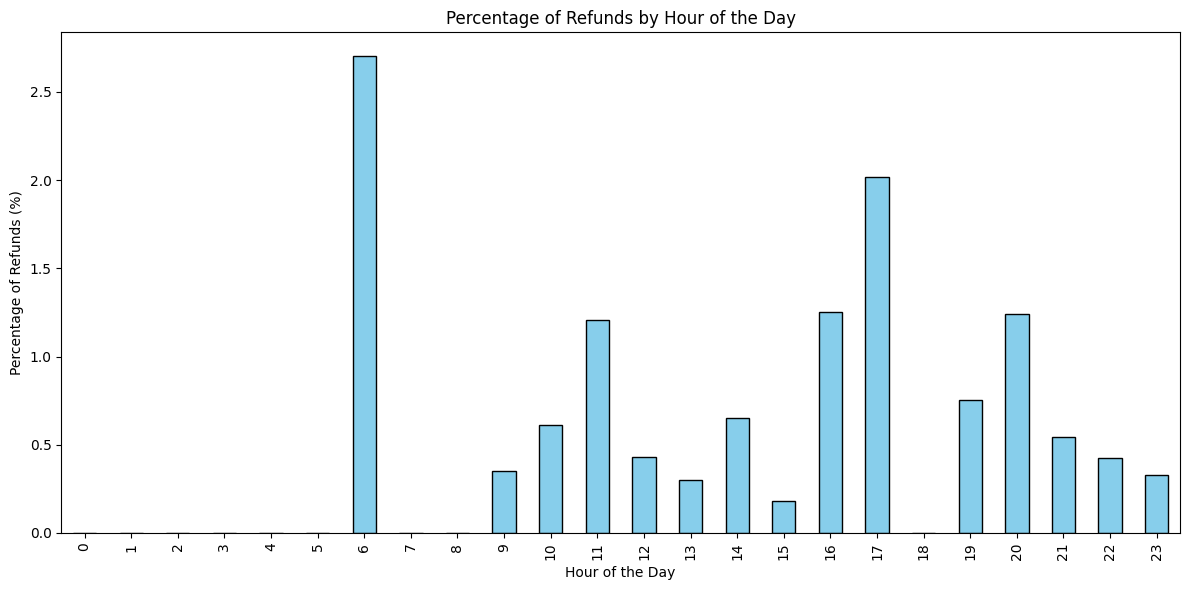

In [32]:
total_orders_per_hour = df_cleaned.groupby('Hour').size()
refunds_per_hour = df_refunded.groupby('Hour').size()

# Filling missing hours with zeros
refunds_per_hour = refunds_per_hour.reindex(total_orders_per_hour.index, fill_value=0)
refund_percentage_per_hour = (refunds_per_hour / total_orders_per_hour) * 100 # Calculate the percentage of refunds per hour

plt.figure(figsize=(12, 6))
refund_percentage_per_hour.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Hour of the Day')
plt.ylabel('Percentage of Refunds (%)')
plt.title('Percentage of Refunds by Hour of the Day')
plt.tight_layout()
plt.show()
